**Bayesian Machine Learning Assignment 2**

Cassandra Maldonado

You just assumed the position of Dean of Clinical Affairs at University of Chicago Mitchell Hospital. Your task is to determine the number of ER personnel to be present at the hospital during the 8-hour shifts.

a) Since you have no idea how many patients will show up on 8-hour shifts, you check the patient logs to have a “prior” belief of the λ. You learned, many years ago from a very fruitful Bayesian Machine Learning class, that the prior distribution for λ of a Poisson process is Gamma. You calculated the parameters of this prior distribution from your logs to be α = 20 and β = 20. Plot the prior distribution 𝑝(λ) for these parameters between 0 < λ < 4. (HINT: you can use scipy.stats.gamma.pdf for this).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

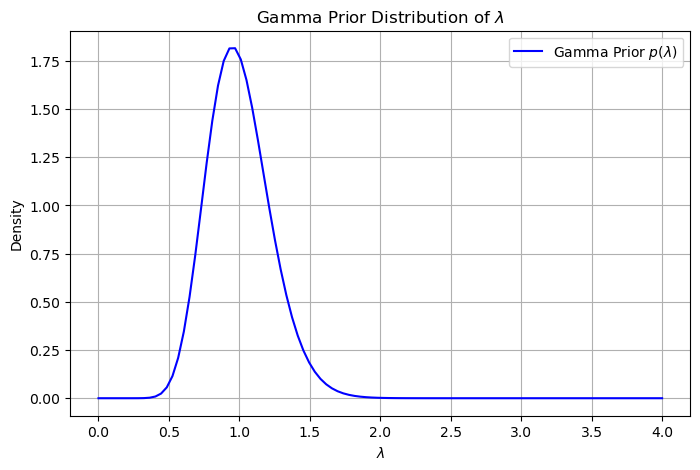

E(λ) = 1.00


In [5]:
# Given parameters for Gamma distribution.
alpha = 20
beta = 20

# Defining lambda values for plotting the prior.
lambda_values = np.linspace(0, 4, 100)

# Calculating the Gamma PDF for the given lambda values.
gamma_pdf = stats.gamma.pdf(lambda_values, a=alpha, scale=1/beta)

plt.figure(figsize=(8, 5))
plt.plot(lambda_values, gamma_pdf, label=r'Gamma Prior $p(\lambda)$', color='blue')
plt.xlabel(r'$\lambda$')
plt.ylabel('Density')
plt.title(r'Gamma Prior Distribution of $\lambda$')
plt.legend()
plt.grid()
plt.show()

# Computing E(lambda) as an estimate for lambda.
E_lambda = alpha / beta
print(f"E(λ) = {E_lambda:.2f}")

b) First, you will use the 𝐸(λ) as your estimate for λ∗ to determine the number of patients you expect. 

i) Plot the predictive probability distribution of patients 𝑝(𝑥|λ∗ ) for this initial estimate between (0<x<10). Remember, the distribution is Poisson. You can use scipy.stats.poisson.pmf

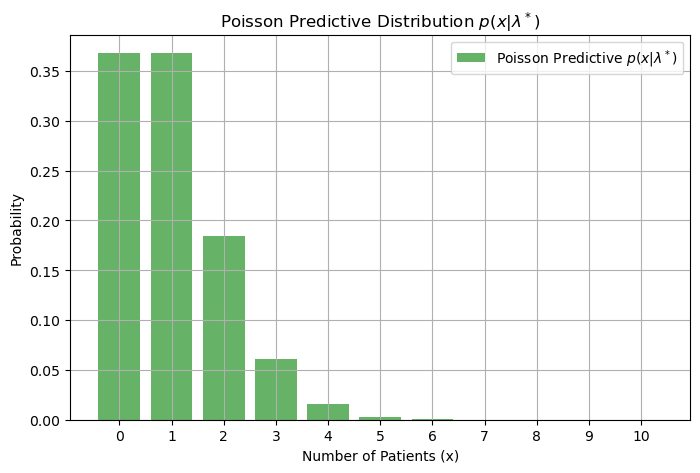

E(X) = 1.00


In [6]:
# Defining x values for Poisson PMF.
x_values = np.arange(0, 11)

# Compute Poisson PMF with lambda.
poisson_pmf = stats.poisson.pmf(x_values, mu=E_lambda)

# Poisson predictive probability distribution.
plt.figure(figsize=(8, 5))
plt.bar(x_values, poisson_pmf, color='green', alpha=0.6, label=r'Poisson Predictive $p(x|\lambda^*)$')
plt.xlabel('Number of Patients (x)')
plt.ylabel('Probability')
plt.title(r'Poisson Predictive Distribution $p(x|\lambda^*)$')
plt.xticks(x_values)
plt.legend()
plt.grid()
plt.show()

# Compute E(X) numerically.
y = [i * j for i, j in zip(x_values, poisson_pmf)]
E_x = np.sum(y) / np.sum(poisson_pmf)
print(f"E(X) = {E_x:.2f}")

ii) Calculate E(X) – this is your expected number of patients on an 8-hour shift. (HINT: You can do the expectation calculation numerically, too – like below).

In [7]:
# E(X)
y = [i * j for i, j in zip(x_values, poisson_pmf)]
E_x = np.sum(y) / np.sum(poisson_pmf)

E_lambda, E_x

(1.0, 0.9999998986222871)

c) After your first day at work, you get some negative feedback from the crew that they felt understaffed. You ask for the first day’s records, and your staff report that the numbers of patients showed on the three 8-hour shifts that day were [3, 4, 1]. Now, you have your first data! (yay) 𝐷 = 𝑥" , 𝑥# , 𝑥$ . What is the likelihood of this first day, based on your λ∗ ?

In [10]:
# Given observed patient counts for three 8-hour shifts.
observed_patients = [3, 4, 1]

# Computing the likelihood for each shift using Poisson PMF with λ* = E_lambda.
likelihoods = [stats.poisson.pmf(x, mu=E_lambda) for x in observed_patients]

# Computing the overall likelihood by multiplying individual likelihoods.
overall_likelihood = np.prod(likelihoods)

likelihoods, overall_likelihood

print(f"Likelihoods: {likelihoods}")
print(f"Overall Likelihood: {overall_likelihood:.4f}")

Likelihoods: [0.06131324019524039, 0.015328310048810101, 0.36787944117144233]
Overall Likelihood: 0.0003


The likelihood of observing 3 patients in a shift given λ^* = 1.0 : 0.0613
The likelihood of observing 4 patients in a shift given  λ^* = 1.0 : 0.0153
The likelihood of observing 1 patient in a shift given λ^* = 1.0 : 0.3678

Overall Likelihood:
P(D |λ^*) = 0.0613 * 0.0153 * 0.3679 = 0.00035

The likelihood of this first day’s patient observations under the assumed λ = 1.0* is 0.03457%, indicating that the observed data is very unlikely under our initial assumption.

d. Calculate the Maximum Likelihood estimate of your new λ, based on your first day.

In [14]:
# The MLE for λ in a Poisson distribution is the sample mean.
lambda_mle = np.mean(observed_patients)

lambda_mle

print(f"Maximum Likelihood Estimate (MLE) for λ: {lambda_mle:.4f}")

Maximum Likelihood Estimate (MLE) for λ: 2.6667


The MLE for λ in a Poisson distribution is the sample mean of the observed data, so the new estimated λ based on the first day’s data is approximately 2.66.

e. Now calculate and plot your posterior distribution of 𝑝(𝜆|𝐷). What are the new α, β?

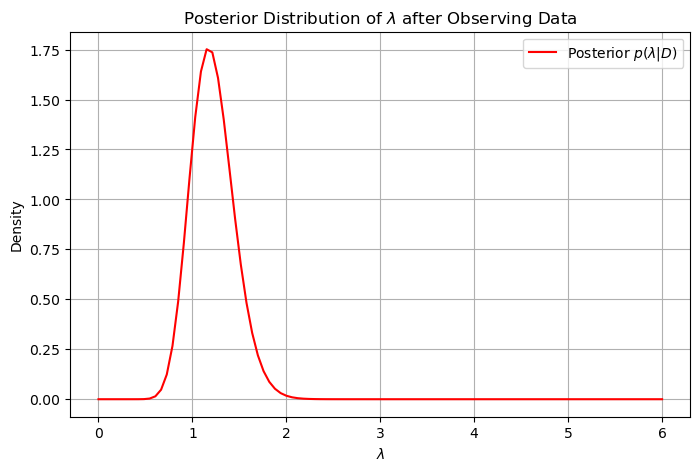

Updated Parameters: α = 28, β = 23


In [15]:
# Updating the Gamma distribution parameters with Bayesian approach.
alpha_new = alpha + sum(observed_patients)
beta_new = beta + len(observed_patients)

# Definining new lambda values for posterior distribution.
lambda_values_new = np.linspace(0, 6, 100)

# Posterior Gamma PDF.
gamma_posterior_pdf = stats.gamma.pdf(lambda_values_new, a=alpha_new, scale=1/beta_new)

# Posterior distribution.
plt.figure(figsize=(8, 5))
plt.plot(lambda_values_new, gamma_posterior_pdf, label=r'Posterior $p(\lambda|D)$', color='red')
plt.xlabel(r'$\lambda$')
plt.ylabel('Density')
plt.title(r'Posterior Distribution of $\lambda$ after Observing Data')
plt.legend()
plt.grid()
plt.show()

alpha_new, beta_new

print(f"Updated Parameters: α = {alpha_new}, β = {beta_new}")

New parameters after Bayesian updating:
- alpha_new = alpha + sum(x) = 20 + (3 + 4 + 1) = 28 
- beta_new = beta + n = 20 + 3 = 23 

The posterior distribution shows the updated belief about lambda after observing the first day’s data. So, the new posterior distribution is a Gamma(28, 23) distribution.

f. Calculate the Maximum a Posteriori estimate of your new λ, based on your first day and your prior information.

In [17]:
# The MAP estimate for a Gamma(α, β) distribution is (α - 1) / β.
lambda_map = (alpha_new - 1) / beta_new

lambda_map
print(f"Maximum A Posteriori (MAP) Estimate for λ: {lambda_map:.4f}")

Maximum A Posteriori (MAP) Estimate for λ: 1.1739


The MAP estimate for λ in a Gamma(α, β) distribution is given by:

λ MAP = (28 - 1)/23 = 1.1739.

The new MAP estimate of λ is approximately 1.17.

g. Plot the posterior predictive distribution of the expected number of patients 𝑝(𝑥|𝐷). This becomes negative binomial with parameters 𝑛 = α' and 𝑝 = β′ / β′ + 1, where α' and β′ are the posterior parameters of 𝑝(𝜆|𝐷) you calculated at part e. So, you will use scipy.stats.nbinom.pmf.

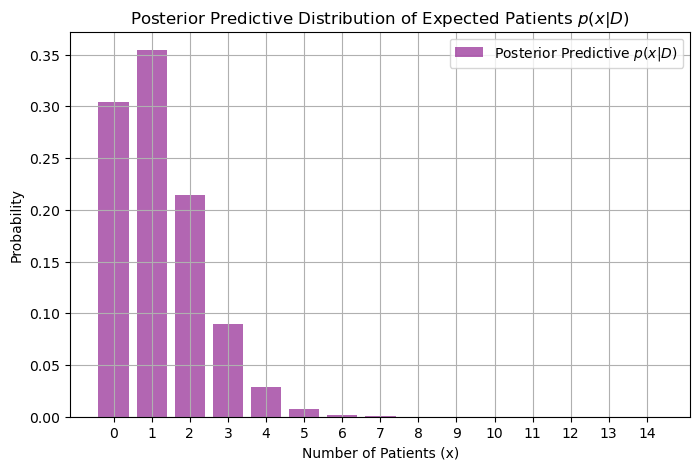

Negative Binomial Parameters: n = 28, p = 0.9583333333333334


In [18]:
# Computing parameters for the Negative Binomial distribution. 
n_nbinom = alpha_new  #n
p_nbinom = beta_new / (beta_new + 1)  #p

# Defining x values for the posterior predictive distribution.
x_values_nbinom = np.arange(0, 15)

# Computing Negative Binomial PMF.
nbinom_pmf = stats.nbinom.pmf(x_values_nbinom, n=n_nbinom, p=p_nbinom)

# Posterior predictive distribution.
plt.figure(figsize=(8, 5))
plt.bar(x_values_nbinom, nbinom_pmf, color='purple', alpha=0.6, label=r'Posterior Predictive $p(x|D)$')
plt.xlabel('Number of Patients (x)')
plt.ylabel('Probability')
plt.title(r'Posterior Predictive Distribution of Expected Patients $p(x|D)$')
plt.xticks(x_values_nbinom)
plt.legend()
plt.grid()
plt.show()

# Parameters of the Negative Binomial distribution.
print(f"Negative Binomial Parameters: n = {n_nbinom}, p = {p_nbinom}")

The posterior predictive distribution follows a Negative Binomial distribution with:
- n = α' = 28 
- p = β′ / β′ + 1 = 23/24 = 0.9583.

The plot above shows the probability mass function (PMF) of p(x|D), giving the updated expected number of patients per shift. The posterior predictive distribution now accounts for both prior knowledge and observed data, better estimating the expected patient counts.